**Bases utilizadas:**
- olist_orders_dataset
- olist_order_items_dataset
- olist_customers_dataset

**Perguntas:**

1. Quantidade/percentual de pedidos entregues por região
2. Qual o valor médio de frete por localidade/região?
3. Quais localidades/regiões ocorrem mais atrasos na entrega?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pedidos

In [2]:
df_pedidos = pd.read_csv('olist_orders_dataset.csv')
df_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
columns_drop = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos.head()

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-17 15:08:01,2017-03-28 00:00:00
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,2018-03-02 00:00:00
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,2017-09-27 00:00:00
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['order_estimated_delivery_date'] = pd.to_datetime(df_pedidos['order_estimated_delivery_date'])

## Itens do Pedido

In [8]:
df_itens_pedido = pd.read_csv('olist_order_items_dataset.csv')
df_itens_pedido.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
df_itens_pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
columns_drop = ['product_id', 'seller_id', 'shipping_limit_date']
df_itens_pedido = df_itens_pedido.drop(columns_drop, axis=1)

## Cliente

In [12]:
df_clientes = pd.read_csv('olist_customers_dataset.csv')
df_clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [13]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
df_clientes = df_clientes.drop('customer_unique_id', axis=1)

## Juntando os datasets

In [15]:
df_olist = pd.merge(df_pedidos, df_itens_pedido, on='order_id', how='inner')

In [16]:
df_olist = pd.merge(df_olist, df_clientes, on='customer_id', how='inner')
df_olist

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26,1,19.90,8.72,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,2018-03-02,1,174.90,20.10,11722,praia grande,SP
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,2017-09-27,1,205.99,65.02,45920,nova vicosa,BA
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15,1,179.99,40.59,28685,japuiba,RJ
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15,2,179.99,40.59,28685,japuiba,RJ


In [17]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   customer_id                    110197 non-null  object        
 2   order_status                   110197 non-null  object        
 3   order_delivered_customer_date  110189 non-null  datetime64[ns]
 4   order_estimated_delivery_date  110197 non-null  datetime64[ns]
 5   order_item_id                  110197 non-null  int64         
 6   price                          110197 non-null  float64       
 7   freight_value                  110197 non-null  float64       
 8   customer_zip_code_prefix       110197 non-null  int64         
 9   customer_city                  110197 non-null  object        
 10  customer_state                 110197 non-null  object        
dtype

In [21]:
df_olist.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
price                            0
freight_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [20]:
df_olist = df_olist.dropna(subset=['order_delivered_customer_date'])
# remove as linhas que tem valores nulos apenas na coluna especificada

In [22]:
df_olist = df_olist.reset_index(drop=True)

### Qual a quantidade/percentual de pedidos entregues por região?

In [23]:
sudeste = ["RJ", "MG", "ES", "SP"]
sul = ["PR", "SC", "RS"]
centro_oeste = ["MT", "MS", "GO", "DF"]
nordeste = ["BA", "PI", "MA", "CE", "AL", "PE", "PB", "SE", "RN"]
norte = ["AC", "AM", "RO", "RR", "PA", "AP", "TO"]

df_olist.loc[df_olist['customer_state'].isin(sudeste), 'region'] = 'sudeste'
df_olist.loc[df_olist['customer_state'].isin(sul), 'region'] = 'sul'
df_olist.loc[df_olist['customer_state'].isin(centro_oeste), 'region'] = 'centro-oeste'
df_olist.loc[df_olist['customer_state'].isin(nordeste), 'region'] = 'nordeste'
df_olist.loc[df_olist['customer_state'].isin(norte), 'region'] = 'norte'

df_olist

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,region
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,3149,sao paulo,SP,sudeste
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,47813,barreiras,BA,nordeste
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,75265,vianopolis,GO,centro-oeste
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,59296,sao goncalo do amarante,RN,nordeste
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26,1,19.90,8.72,9195,santo andre,SP,sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...
110184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,2018-03-02,1,174.90,20.10,11722,praia grande,SP,sudeste
110185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,2017-09-27,1,205.99,65.02,45920,nova vicosa,BA,nordeste
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15,1,179.99,40.59,28685,japuiba,RJ,sudeste
110187,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15,2,179.99,40.59,28685,japuiba,RJ,sudeste


In [24]:
df_olist['region'].value_counts()

region
sudeste         75725
sul             15879
nordeste        10087
centro-oeste     6480
norte            2018
Name: count, dtype: int64

In [25]:
df_olist['region'].value_counts(normalize=True)

region
sudeste         0.687228
sul             0.144107
nordeste        0.091543
centro-oeste    0.058808
norte           0.018314
Name: proportion, dtype: float64

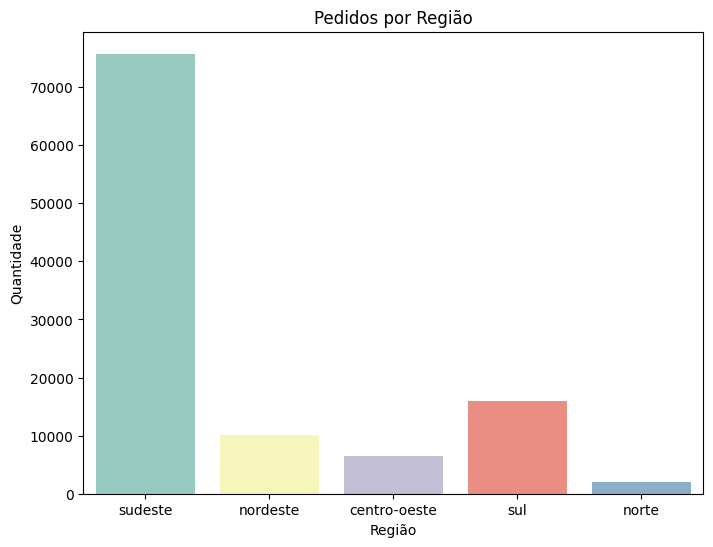

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data= df_olist, x='region', hue='region', palette='Set3')
plt.title('Pedidos por Região')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.show()

### Qual o valor médio de frete por região?

In [27]:
frete_medio = df_olist.groupby('region')['freight_value'].mean()

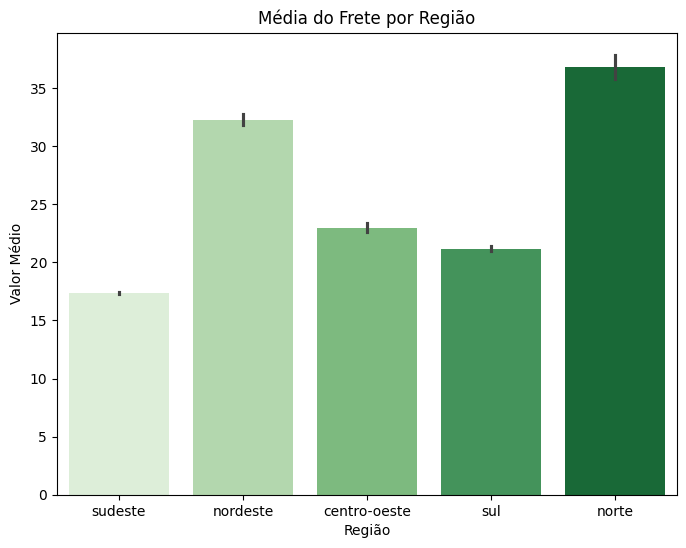

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data= df_olist, x='region', y='freight_value', hue='region', palette='Greens', legend=False)
plt.title('Média do Frete por Região')
plt.xlabel('Região')
plt.ylabel('Valor Médio')
plt.show()

In [29]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110189 entries, 0 to 110188
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110189 non-null  object        
 1   customer_id                    110189 non-null  object        
 2   order_status                   110189 non-null  object        
 3   order_delivered_customer_date  110189 non-null  datetime64[ns]
 4   order_estimated_delivery_date  110189 non-null  datetime64[ns]
 5   order_item_id                  110189 non-null  int64         
 6   price                          110189 non-null  float64       
 7   freight_value                  110189 non-null  float64       
 8   customer_zip_code_prefix       110189 non-null  int64         
 9   customer_city                  110189 non-null  object        
 10  customer_state                 110189 non-null  object        
 11  

### Quais localidades/regiões ocorrem mais atrasos na entrega?

In [30]:
df_olist['order_delivered_date'] = df_olist['order_delivered_customer_date'].dt.date
df_olist['order_estimated_date'] = df_olist['order_estimated_delivery_date'].dt.date

df_olist.loc[df_olist['order_delivered_date'] > df_olist['order_estimated_date'], 'delivery_status'] = 'Atrasado'
df_olist.loc[df_olist['order_delivered_date'] < df_olist['order_estimated_date'], 'delivery_status'] = 'Adiantado'
df_olist.loc[df_olist['order_delivered_date'] == df_olist['order_estimated_date'], 'delivery_status'] = 'No Prazo'

df_olist

,order_id,customer_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,region,order_delivered_date,order_estimated_date,delivery_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-10 21:25:13,2017-10-18,1,29.99,8.72,3149,sao paulo,SP,sudeste,2017-10-10,2017-10-18,Adiantado
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-08-07 15:27:45,2018-08-13,1,118.70,22.76,47813,barreiras,BA,nordeste,2018-08-07,2018-08-13,Adiantado
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-17 18:06:29,2018-09-04,1,159.90,19.22,75265,vianopolis,GO,centro-oeste,2018-08-17,2018-09-04,Adiantado
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-12-02 00:28:42,2017-12-15,1,45.00,27.20,59296,sao goncalo do amarante,RN,nordeste,2017-12-02,2017-12-15,Adiantado
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-16 18:17:02,2018-02-26,1,19.90,8.72,9195,santo andre,SP,sudeste,2018-02-16,2018-02-26,Adiantado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-28 17:37:56,2018-03-02,1,174.90,20.10,11722,praia grande,SP,sudeste,2018-02-28,2018-03-02,Adiantado
110185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-09-21 11:24:17,2017-09-27,1,205.99,65.02,45920,nova vicosa,BA,nordeste,2017-09-21,2017-09-27,Adiantado
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15,1,179.99,40.59,28685,japuiba,RJ,sudeste,2018-01-25,2018-02-15,Adiantado
110187,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-25 23:32:54,2018-02-15,2,179.99,40.59,28685,japuiba,RJ,sudeste,2018-01-25,2018-02-15,Adiantado


In [62]:
atrasos_regiao = df_olist[df_olist['delivery_status'] == 'Atrasado'].groupby('region')['delivery_status'].value_counts()
atrasos_regiao.sort_values(ascending=False)

region        delivery_status
sudeste       Atrasado           4491
nordeste      Atrasado           1266
sul           Atrasado            912
centro-oeste  Atrasado            419
norte         Atrasado            176
Name: count, dtype: int64

In [63]:
df_olist.to_csv('base_final_atividade.csv', index=False)